### The purpose of this notebook to is to recreate the "shelf mask" produced in Amaya et al. (2022)

In [1]:
import os
os.chdir('/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves')
plotsdir = lambda x="": "/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves/plots/" + x
GLORYS_dir = lambda x="": "/vortexfs1/home/anthony.meza/GLORYS_data" + x
GLORYS_process_dir = lambda x="": "/vortexfs1/home/anthony.meza/Atmospheric Rivers and Waves/GLORYS_processed/" + x

In [2]:
# from ../help_funcs import * 
# from eofs.xarray import Eof
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import importlib
import xarray as xr
import numpy as np 
import seaborn as sns
import pandas as pd
import cmocean.cm as cm
import netCDF4 as nc
from pathlib import Path
from natsort import natsorted
import matplotlib.pyplot as plt
import gsw

In [3]:
from multiprocessing import Pool
import os 
import multiprocessing
from os.path import exists

In [4]:
%time
from pathlib import Path
from natsort import natsorted
# GLORYS_dir = r"/vortexfs1/home/anthony.meza/GLORYS_data" 
results = [str(result) for result in list(Path(GLORYS_dir()).rglob("*.[nN][cC]"))] #get all files
results = natsorted(results) #sort all files 

years = natsorted(list(set([result[41:45] for result in results])))
months = natsorted(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 5.25 µs


In [5]:
coords_pth = "/vortexfs1/share/cdx/hseo/Data/MERCATOR/GLO-MFC_001_030_coordinates.nc"
bathy_pth = "/vortexfs1/share/cdx/hseo/Data/MERCATOR/GLO-MFC_001_030_mask_bathy.nc"

In [6]:
is_between = lambda ds, x1, x2 : (x1 < ds) & (ds < x2)
not_between = lambda ds, x1, x2 : (ds < x1) & (x2 < ds)

In [8]:
bathy_ds =  xr.open_dataset(bathy_pth).sel(latitude = slice(-2, 60), longitude = slice(-150, -75) ).deptho
bathy = bathy_ds.deptho.sel(latitude = slice(-2, 60), longitude = slice(-150, -75) )
coords = xr.open_dataset(coords_pth).sel(latitude = slice(-2, 60), longitude = slice(-150, -75) )
LON, LAT = np.meshgrid(bathy.longitude, bathy.latitude)
areas = coords.e1t * coords.e2t

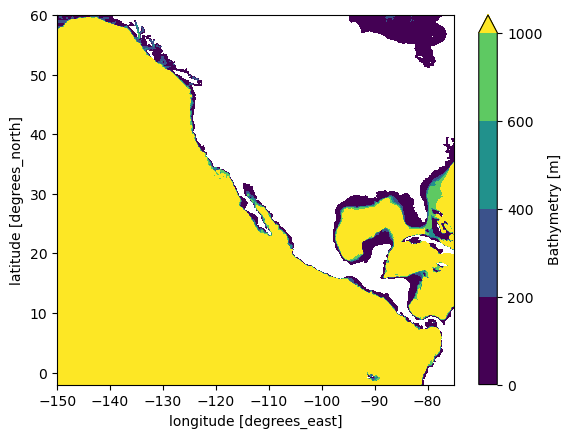

In [13]:
bathy.plot.contourf(levels = [0, 200, 400,600, 1000])

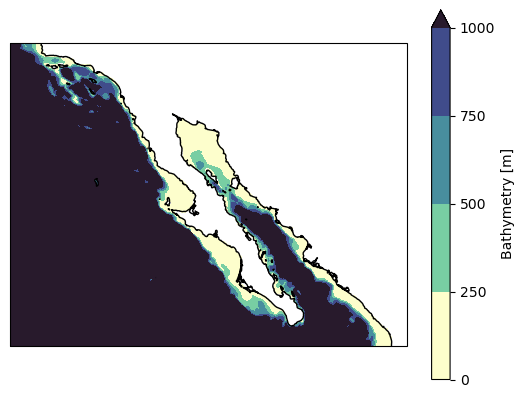

In [35]:
fig, axes = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

bathy.sel(latitude = slice(22, 35),longitude = slice(-122, -105)).plot.contourf(ax = axes, 
    levels = [0, 250, 500, 750, 1000], vmin = 0, vmax = 3000, cmap = cm.deep, alpha = 1)
axes.coastlines()

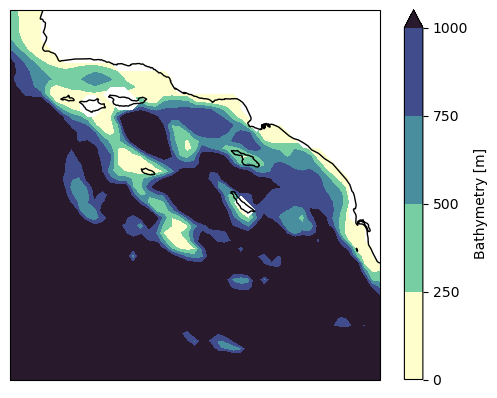

In [37]:
fig, axes = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
bathy.sel(latitude = slice(31, 35),longitude = slice(-121, -117)).plot.contourf(ax = axes, 
    levels = [0, 250, 500, 750, 1000], vmin = 0, vmax = 3000, cmap = cm.deep, alpha = 1)
axes.coastlines()